**Brian Blaylock**  
**February 6, 2019**

# HRRR Percentile Explorer

In [1]:
import numpy as np
from datetime import datetime, timedelta
import xarray
import os
import matplotlib.pyplot as plt


import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_maps.my_basemap import draw_centermap, draw_HRRR_map
from BB_HRRR.HRRR_Pando import get_hrrr_variable, get_hrrr_latlon
from BB_wx_calcs.wind import wind_uv_to_spd
from BB_cmap.NWS_standard_cmap import *

import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

-----------
-----------

In [2]:
month = 6

#variable = 'GUST:surface'
variable = 'UVGRD:10 m'

# A MesoWest station ID or a latitude longitude point i.e. '40.4, -115.2'
location = '37.6,-119.1'

# Map size
map_size = (7,6)

-----------
-----------

In [3]:
# Preload HRRR lat/lon grid
Hlats, Hlons = get_hrrr_latlon(DICT=False)

In [4]:
var = variable.replace(':', '_').replace(' ', '_')

DATE = datetime(2106, month, 15)

# Load OSG stats for every hour of the month
OSG = []
for h in range(24):
    print(DATE)
    # Load OSG statistics
    DIR = '/uufs/chpc.utah.edu/common/home/horel-group8/blaylock/HRRR_OSG/hourly30/%s/' % var
    FILE = 'OSG_HRRR_%s_%s_f00.h5' % (var, DATE.strftime('m%m_d%d_h%H'))
    OSG.append(xarray.open_dataset(DIR+FILE))
    DATE += timedelta(hours=1)

2106-06-15 00:00:00
2106-06-15 01:00:00
2106-06-15 02:00:00
2106-06-15 03:00:00
2106-06-15 04:00:00
2106-06-15 05:00:00
2106-06-15 06:00:00
2106-06-15 07:00:00
2106-06-15 08:00:00
2106-06-15 09:00:00
2106-06-15 10:00:00
2106-06-15 11:00:00
2106-06-15 12:00:00
2106-06-15 13:00:00
2106-06-15 14:00:00
2106-06-15 15:00:00
2106-06-15 16:00:00
2106-06-15 17:00:00
2106-06-15 18:00:00
2106-06-15 19:00:00
2106-06-15 20:00:00
2106-06-15 21:00:00
2106-06-15 22:00:00
2106-06-15 23:00:00


In [5]:
# Make map
lat, lon = np.array(location.split(','), dtype=float)
m = draw_centermap(lat, lon, size=map_size)

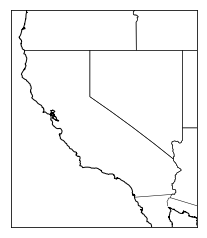

In [6]:
m.drawstates()
m.drawcoastlines()
m.drawcountries()

In [7]:
MONTH = DATE.strftime('%B')
MON = DATE.strftime('%b')

if variable == 'GUST:surface':
    str_var = 'Surface Gust'
    cmap = cm_wind()
elif variable == 'UVGRD:10 m':
    str_var = '10 m Wind Speed'
    cmap = cm_wind()

SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR_OSG/California_%s/%s/' % (MONTH, var)
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)

for hour in range(24):
    fig, axes = plt.subplots(1, 3, figsize=(16,7))

    for ax, p in zip(axes, [50, 95, 100]):
        plt.sca(ax)
        m.pcolormesh(Hlons, Hlats, OSG[hour]['p%02d' % p], latlon=True,
                     vmax=cmap['vmax'],
                     vmin=cmap['vmin'],
                     cmap=cmap['cmap'])
        m.drawstates()
        m.drawcoastlines()
        m.drawcountries()
        plt.colorbar(orientation='horizontal', pad=.01, shrink=.8,
                     label='%s  (m s$\mathregular{^{-1}}$)' % str_var)
        plt.title('%02dth Percentile' % p)
    plt.suptitle('%s %02d:00 UTC' % (MONTH, hour))
    plt.savefig(SAVEDIR+'%s_%s_%02d00-UTC' % (var, MON, hour))
    plt.close()